# DreamBooth-LoRA-Inference

This notebook provides an example and the codes for the inference part for the DreamBooth-LoRA model that makes use of the pre-trained model of:
- MadeByOllin. (2023). madebyollin/sdxl-vae-fp16-fix [Computer software]. Hugging Face. https://huggingface.co/madebyollin/sdxl-vae-fp16-fix

### Set-Up: Check GPU and Load Packages

In [2]:
!pip install diffusers
!pip install torch
!pip install -U peft transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 83.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 77.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.39.3
    Uninstalling transformers-4.39.3:
      Successfully uninstalled transformers-4.39.3


### Define function to showcast the inference

In [6]:
from PIL import Image
import glob

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]

    w, h = imgs[0].size
    grid_w, grid_h = cols * w, rows * h
    grid = Image.new("RGB", size=(grid_w, grid_h))

    for i, img in enumerate(imgs):
        x = i % cols * w
        y = i // cols * h
        grid.paste(img, box=(x, y))

    return grid

### Upload the DreamBooth-LoRA weights from Hugging Face

In [7]:
from diffusers import DiffusionPipeline
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae, torch_dtype=torch.float16, variant="fp16",
    use_safetensors=True
)
pipe.load_lora_weights("HF_model_path", weight_name="pytorch_lora_weights.safetensors", token="HF_TOKEN") # replace HF_model_path and HF_TOKEN with your huggingface token and model path
_ = pipe.to("cuda")

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### Examples of inference with 1000 number of steps training

  0%|          | 0/50 [00:00<?, ?it/s]

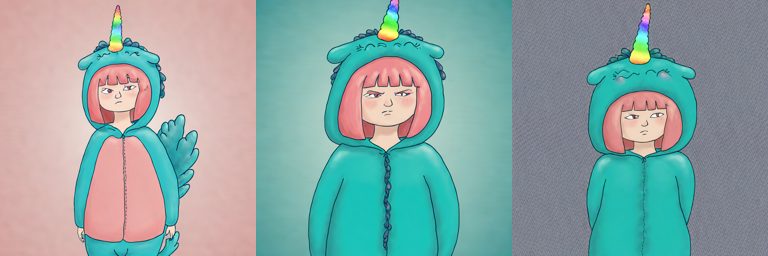

In [19]:
prompt = "A picture of UnicornGirl looking angry" # replace with your prompt

image = pipe(prompt=prompt, num_inference_steps=50, num_images_per_prompt = 3)
# image = pipe(prompt=prompt, num_inference_steps=5, num_images_per_prompt = 1)
image_grid(image.images, 1, 3)

  0%|          | 0/50 [00:00<?, ?it/s]

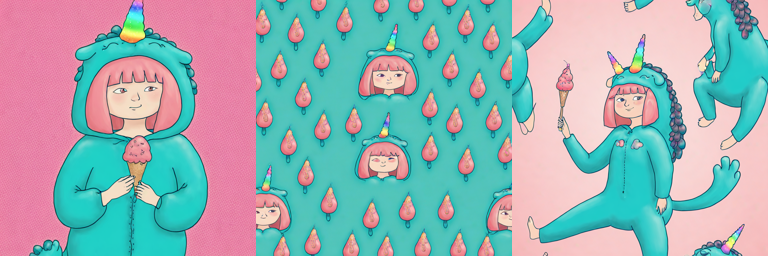

In [22]:
prompt = "A picture of UnicornGirl with ice cream"

image = pipe(prompt=prompt, num_inference_steps=50, num_images_per_prompt = 3)
# image = pipe(prompt=prompt, num_inference_steps=5, num_images_per_prompt = 1)
image_grid(image.images, 1, 3)

  0%|          | 0/50 [00:00<?, ?it/s]

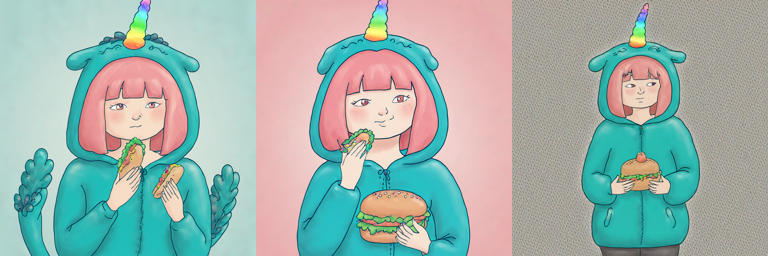

In [26]:
prompt = "A picture of UnicornGirl eating a sandwich"

image = pipe(prompt=prompt, num_inference_steps=50, num_images_per_prompt = 3)
# image = pipe(prompt=prompt, num_inference_steps=5, num_images_per_prompt = 1)
image_grid(image.images, 1, 3)